<h1>DA Tools 1 Final Project</h1>
<h3>Walter Meeker, Cortland McHale, Ryan Wilson</h3>

<h2>Bejing Air Quality Data Cleaning and Analysis</h2>



In [ ]:
#https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data
#https://royalsocietypublishing.org/doi/full/10.1098/rspa.2017.0457#d21448504e1

import pandas as pd
import os
import glob
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
import copy
import matplotlib.pyplot as plt

#If data is not downloaded, download and unzip
if not os.path.isdir('PRSA_Data_20130301-20170228'):
    print("downloading data")
    zipurl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip'
    with urlopen(zipurl) as zipresp:
        with ZipFile(BytesIO(zipresp.read())) as zfile:
            zfile.extractall('./')
else:
    print("data already downloaded")

#Create dic off all files/city dataframe. example: dic['Aotizhongxin']


csv_files = glob.glob(os.path.join('PRSA_Data_20130301-20170228', "*.csv"))
dic={}
for f in csv_files:
    city=f.split("_")[4]
    dic[city] = pd.read_csv(f)
    
    #Convert invidual time fields to datetime. Drop unnessary columns 
    dic[city]['datetime']=pd.to_datetime(dic[city][['year', 'month', 'day', 'hour']])
    dic[city].drop(columns=['No','year', 'month', 'day', 'hour'], inplace=True)
    dic[city].index=dic[city]['datetime']

In [2]:
#create df sum of NaN values per city/file
df_na = pd.DataFrame(index=[dic['Aotizhongxin'].columns])
for k in dic.keys():
    ser=dic[k].isna().sum()
    df_na[k]=ser.values
    
df_na

,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
PM2.5,925,774,779,750,616,646,953,628,913,677,382,696
PM10,718,582,656,553,429,381,777,440,548,597,284,484
SO2,935,628,730,663,474,507,980,446,1296,1118,575,669
NO2,1023,667,1234,1601,659,668,1639,692,1365,744,1070,754
CO,1776,1521,2012,3197,1753,1401,1422,1206,2178,1126,1812,1297
O3,1719,604,1214,664,1173,729,1151,506,1489,843,2107,1078
TEMP,20,53,53,20,20,51,51,20,51,20,20,19
PRES,20,50,50,20,20,50,53,20,51,20,20,19
DEWP,20,53,53,20,20,51,53,20,54,20,20,19
RAIN,20,51,51,20,20,43,55,20,51,20,20,19


In [3]:
#total NaN by city/file
df_na.sum()

Aotizhongxin     7271
Changping        5166
Dingling         7015
Dongsi           7600
Guanyuan         5279
Gucheng          4728
Huairou          7485
Nongzhanguan     4090
Shunyi           8523
Tiantan          5277
Wanliu           6447
Wanshouxigong    5146
dtype: int64

In [4]:
dic['Aotizhongxin'].columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'wd', 'WSPM', 'station', 'datetime'],
      dtype='object')

In [5]:
#create dfs with 1 for all NaN values to plot NaN trends
na_dic= copy.deepcopy(dic)
for k in na_dic.keys():
    na_dic[k].index=na_dic[k]['datetime']
    na_dic[k]=na_dic[k].isna().astype('int')

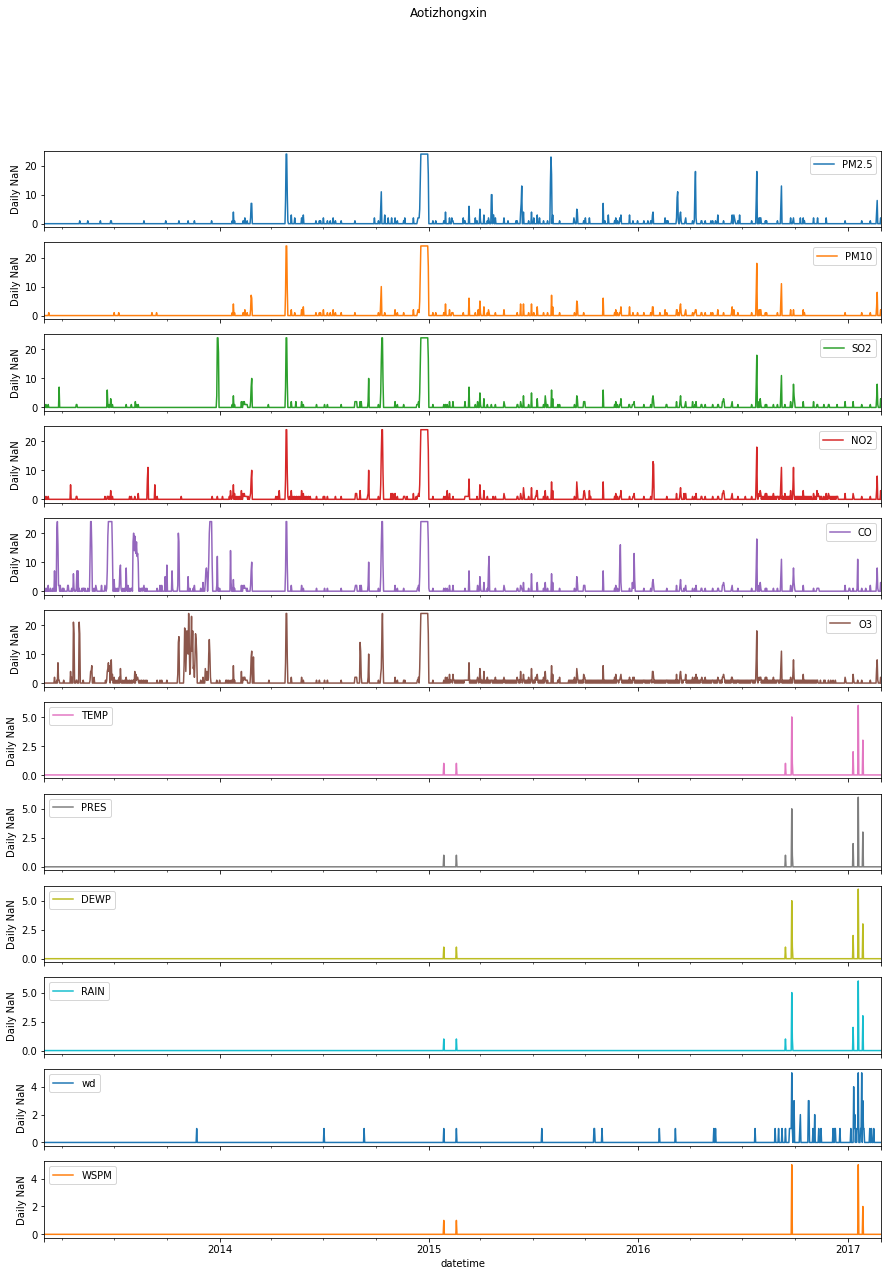

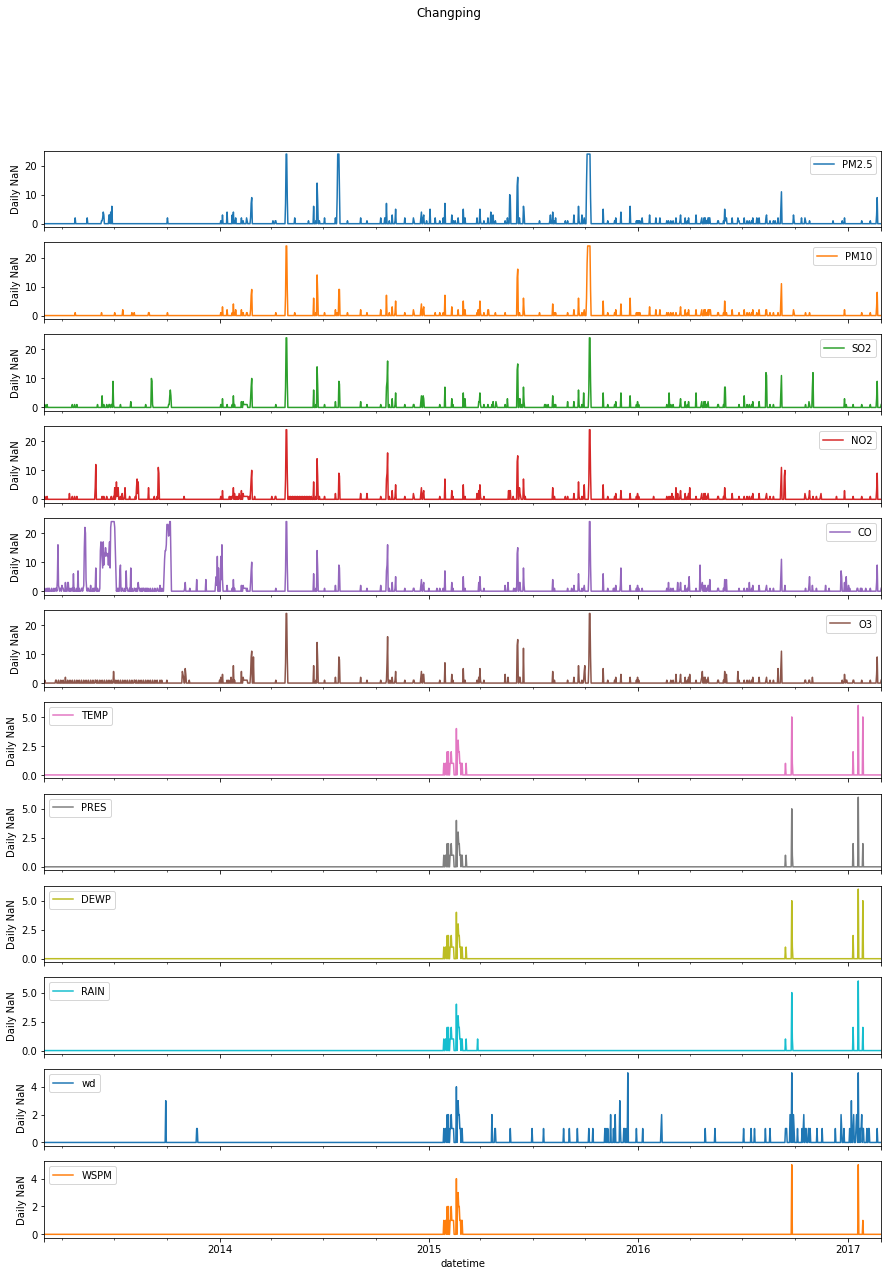

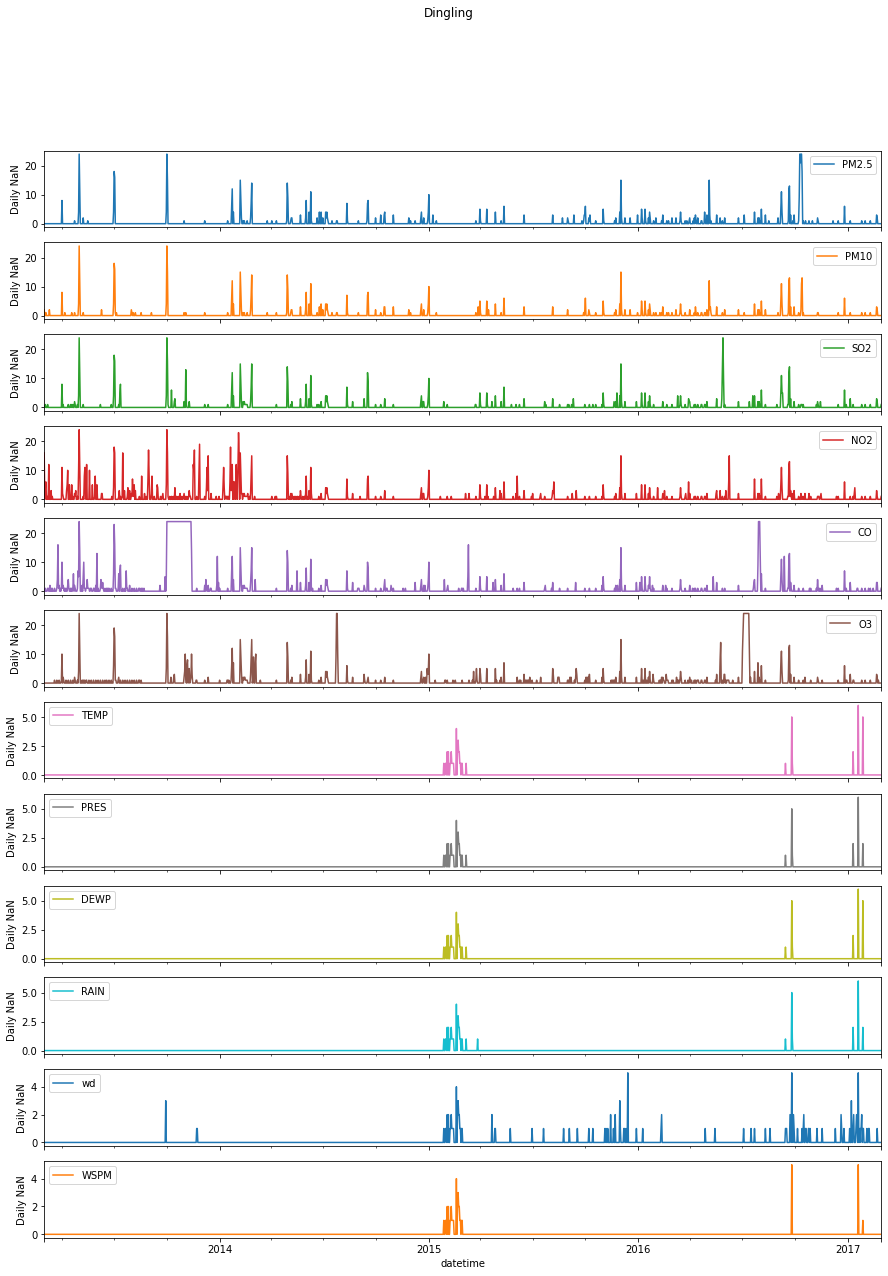

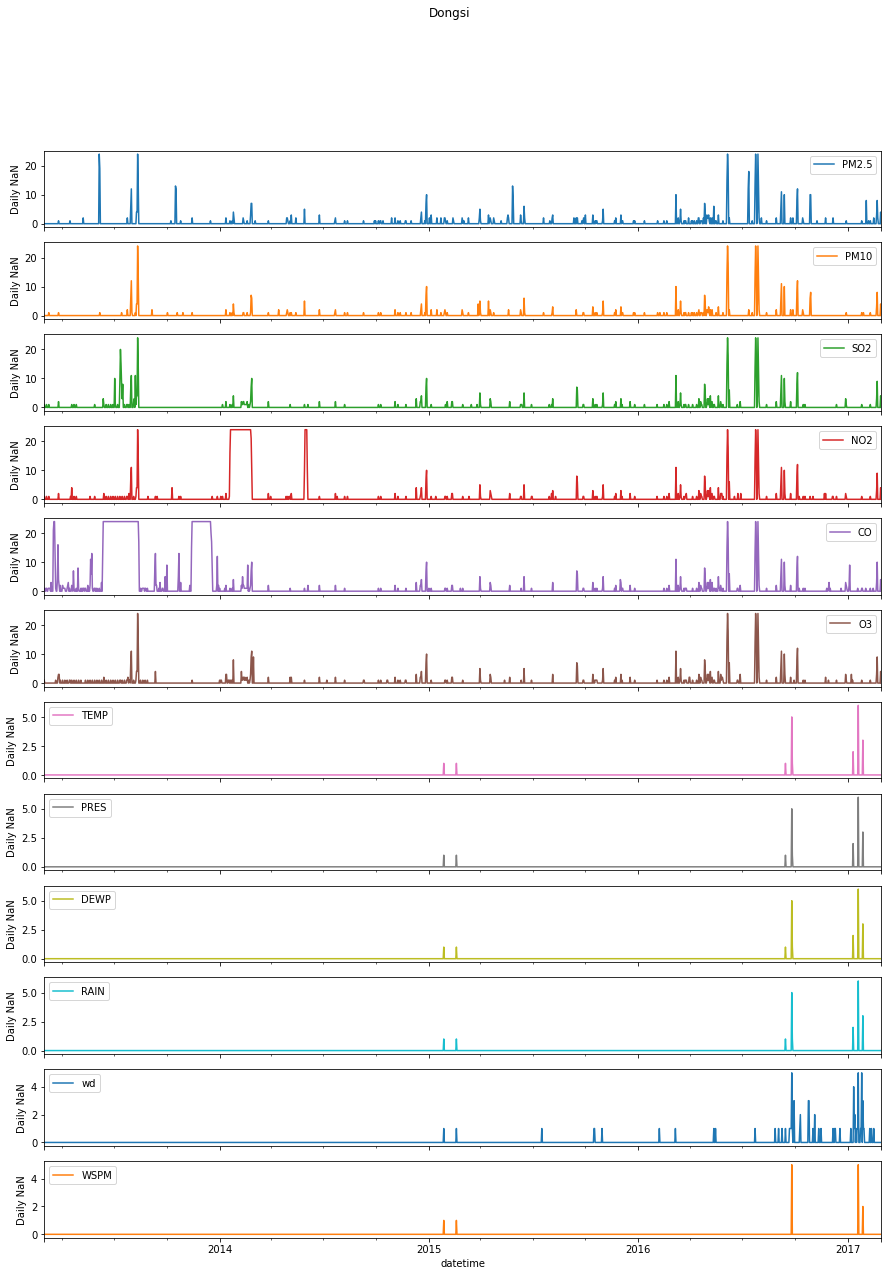

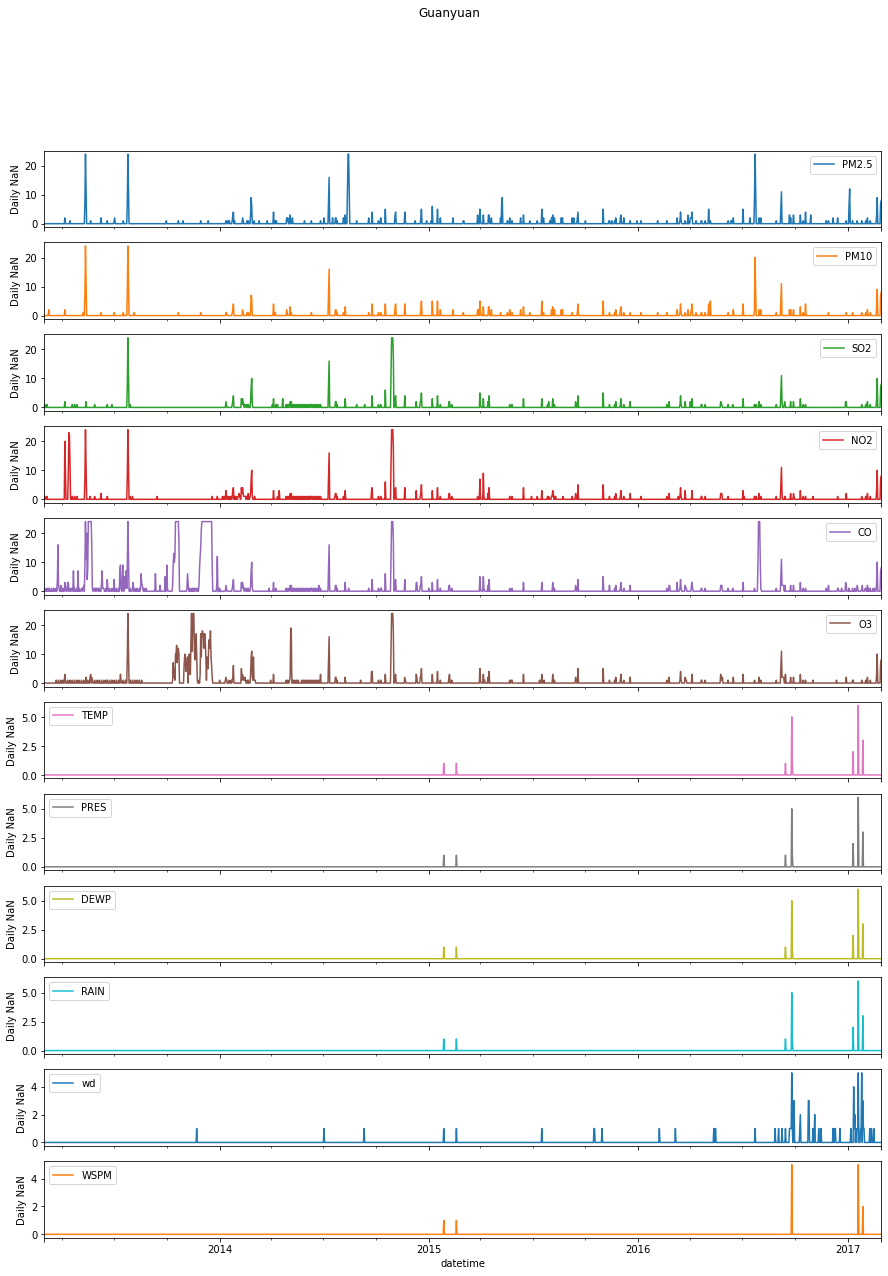

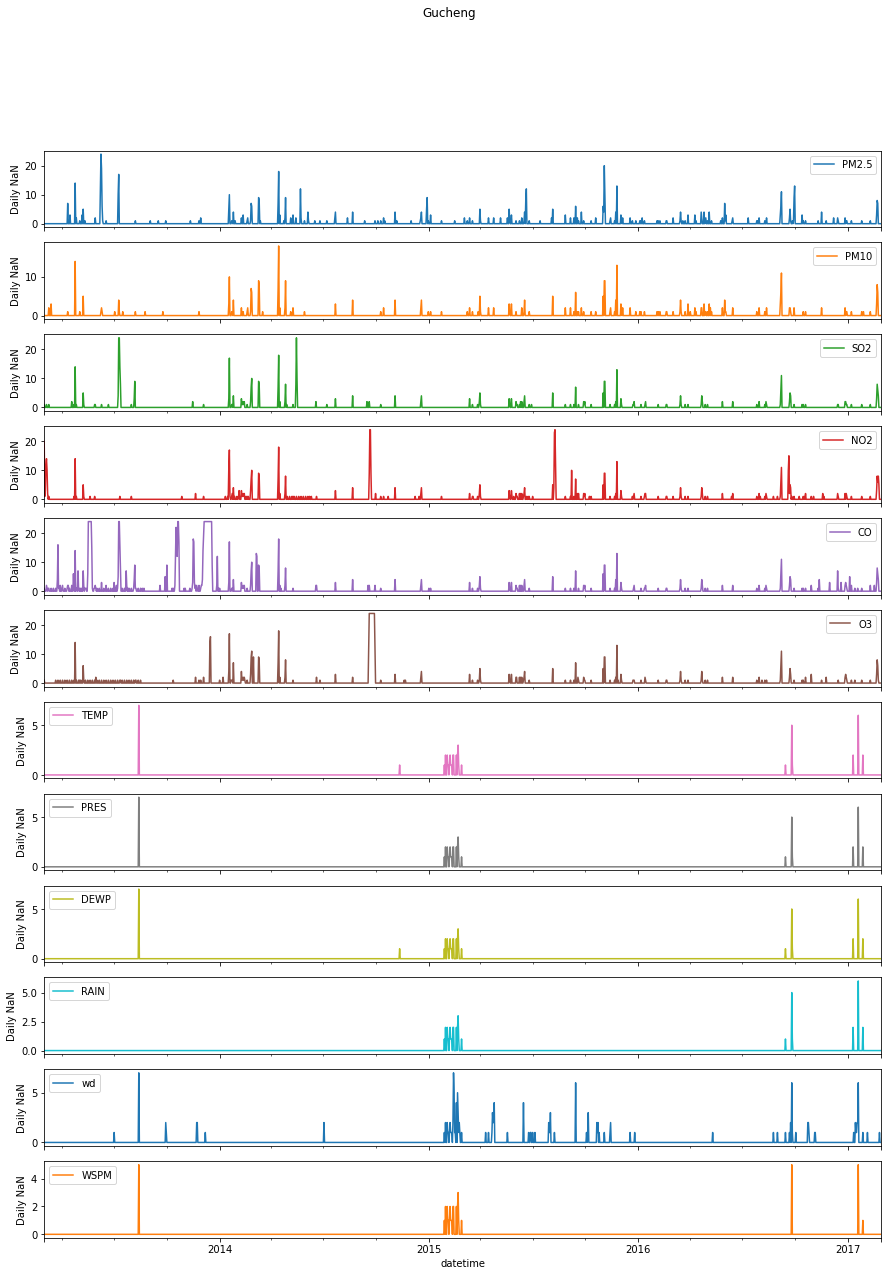

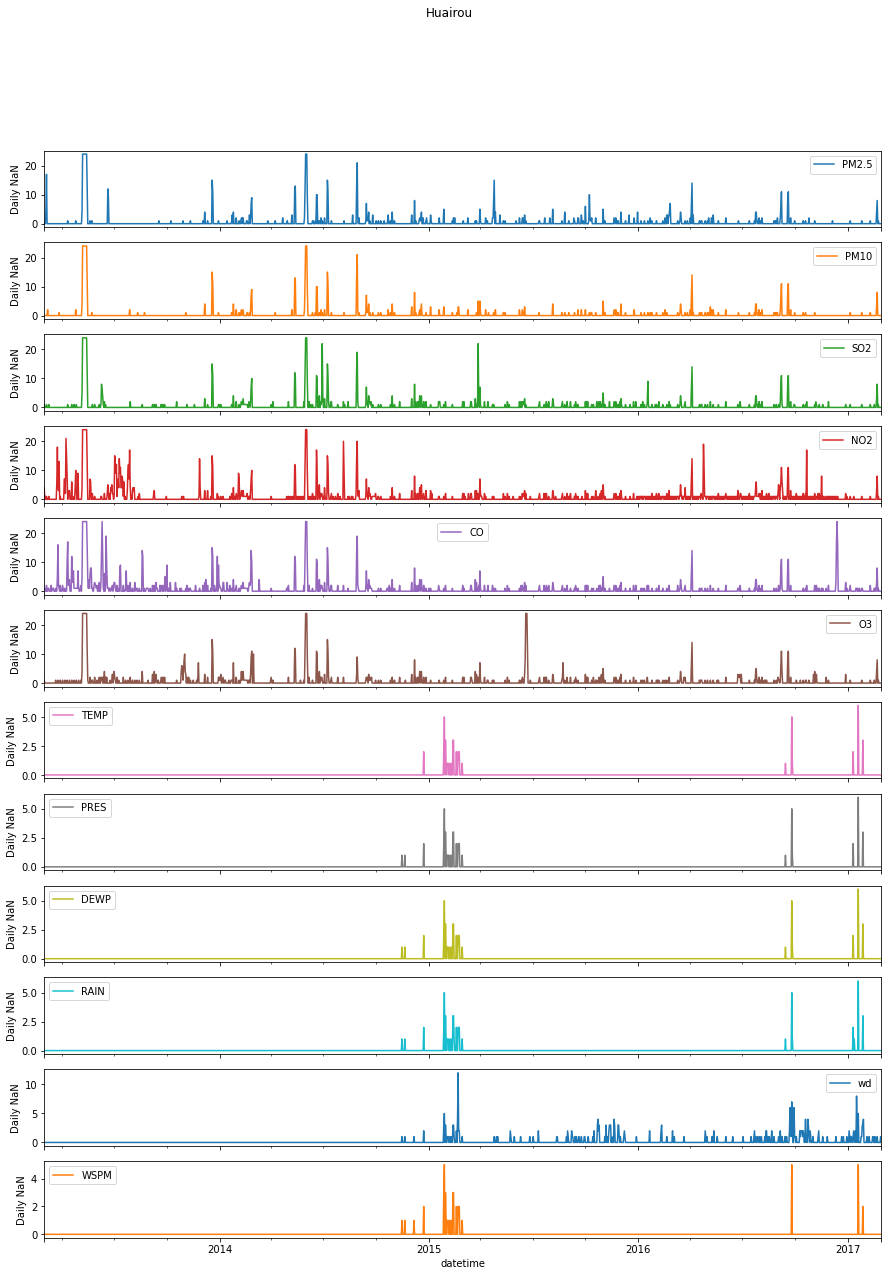

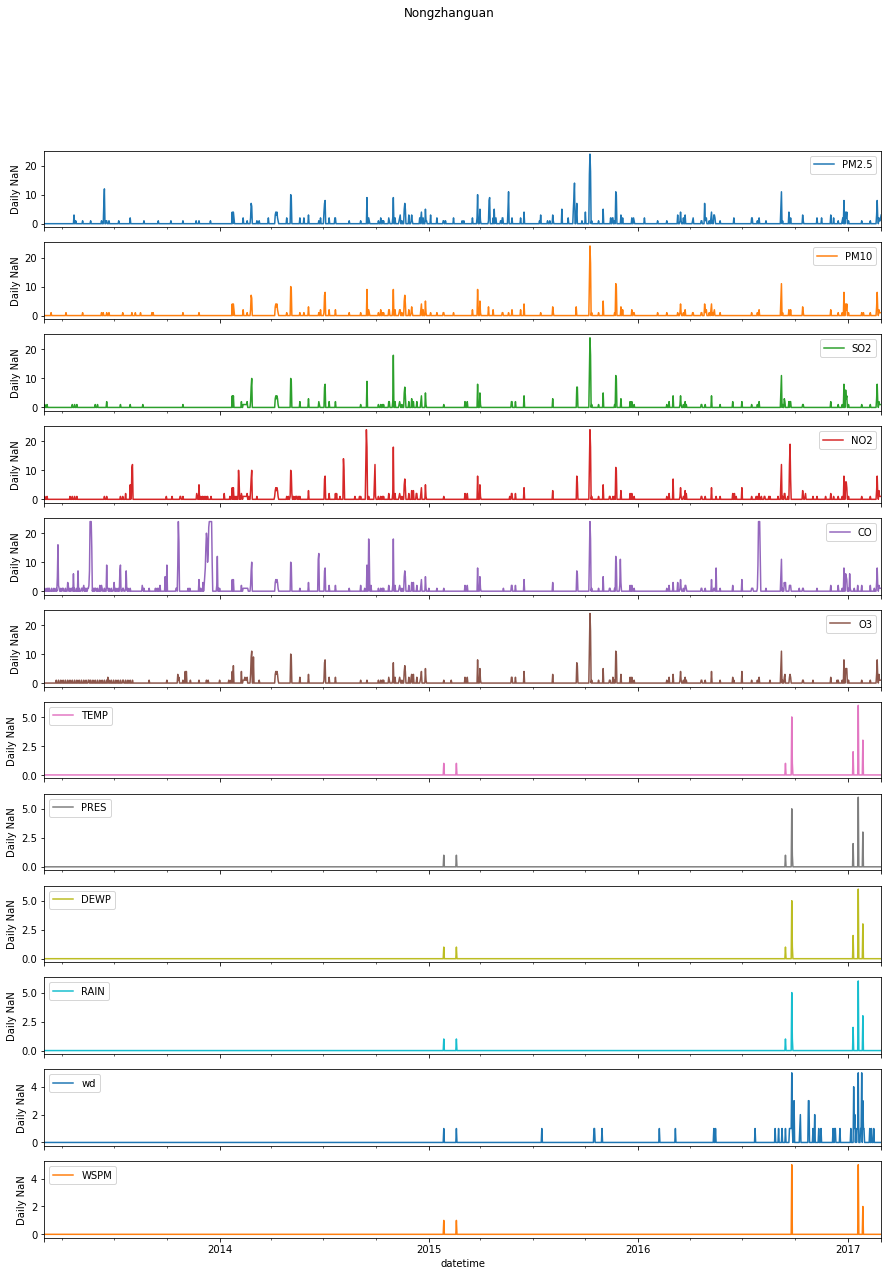

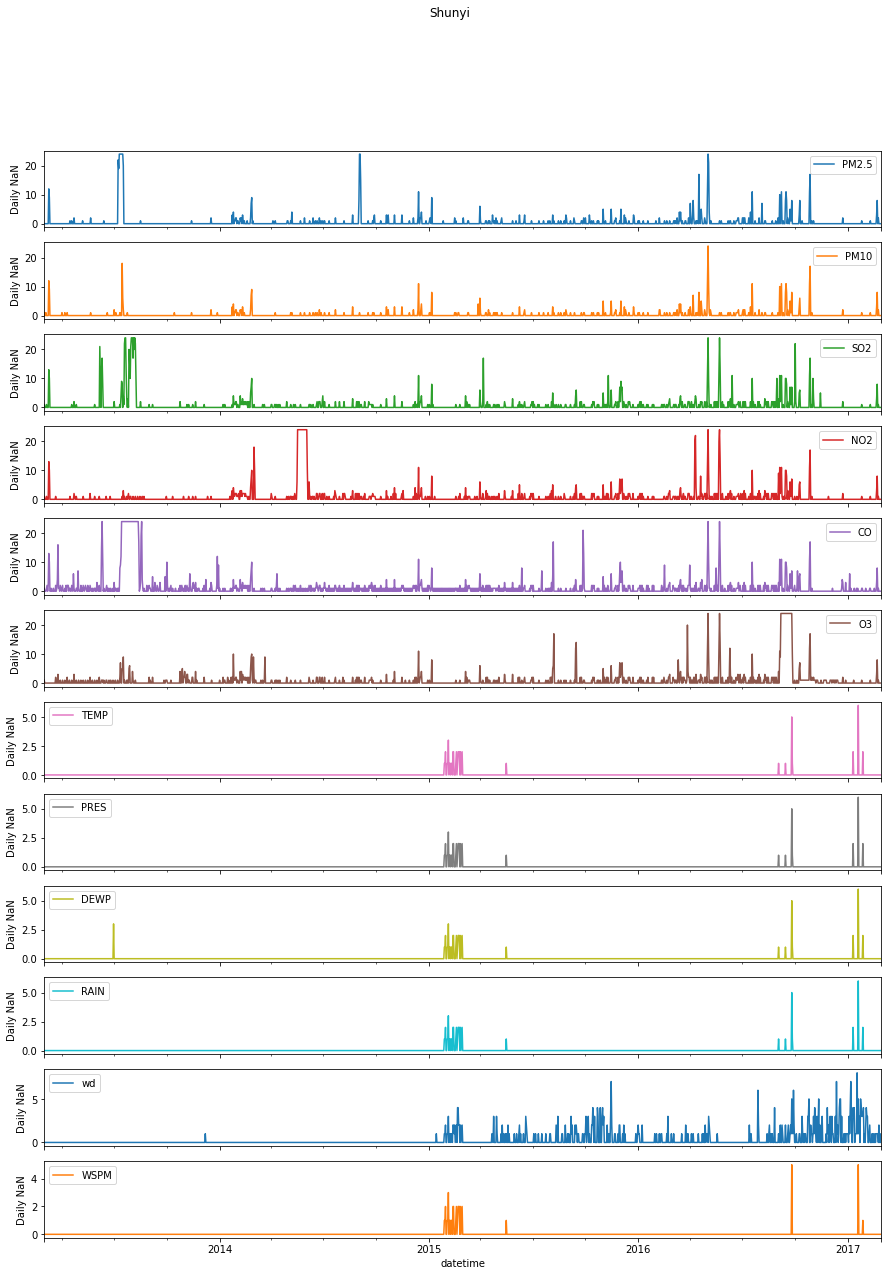

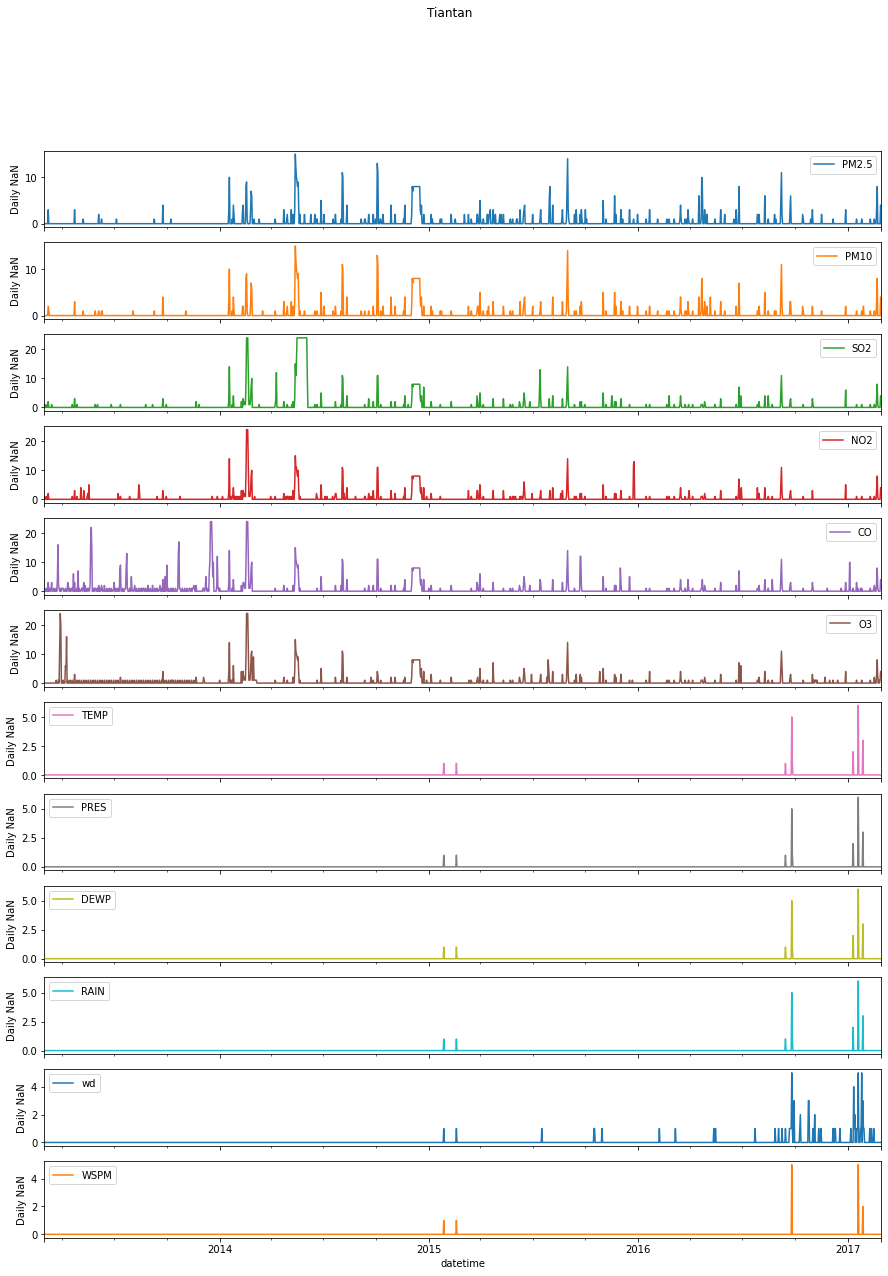

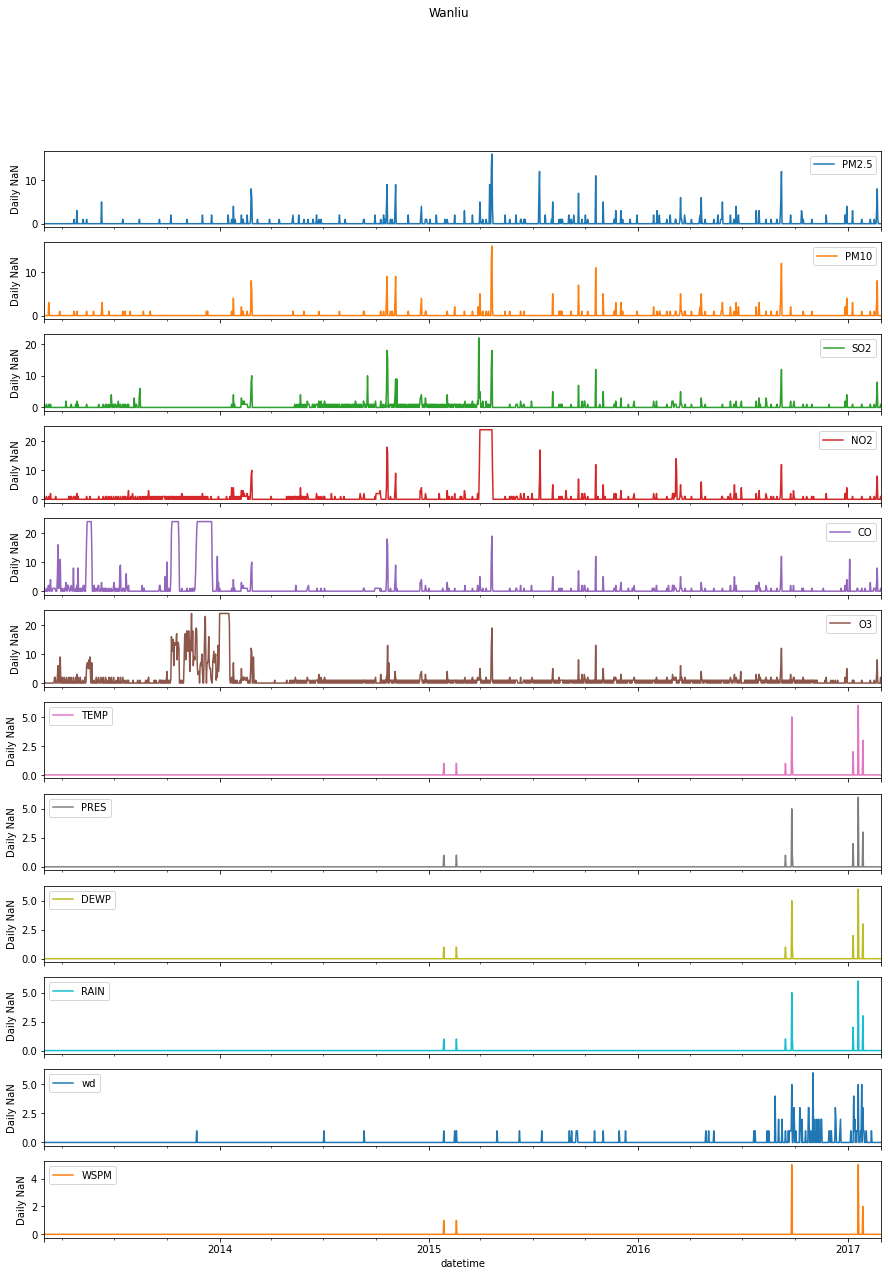

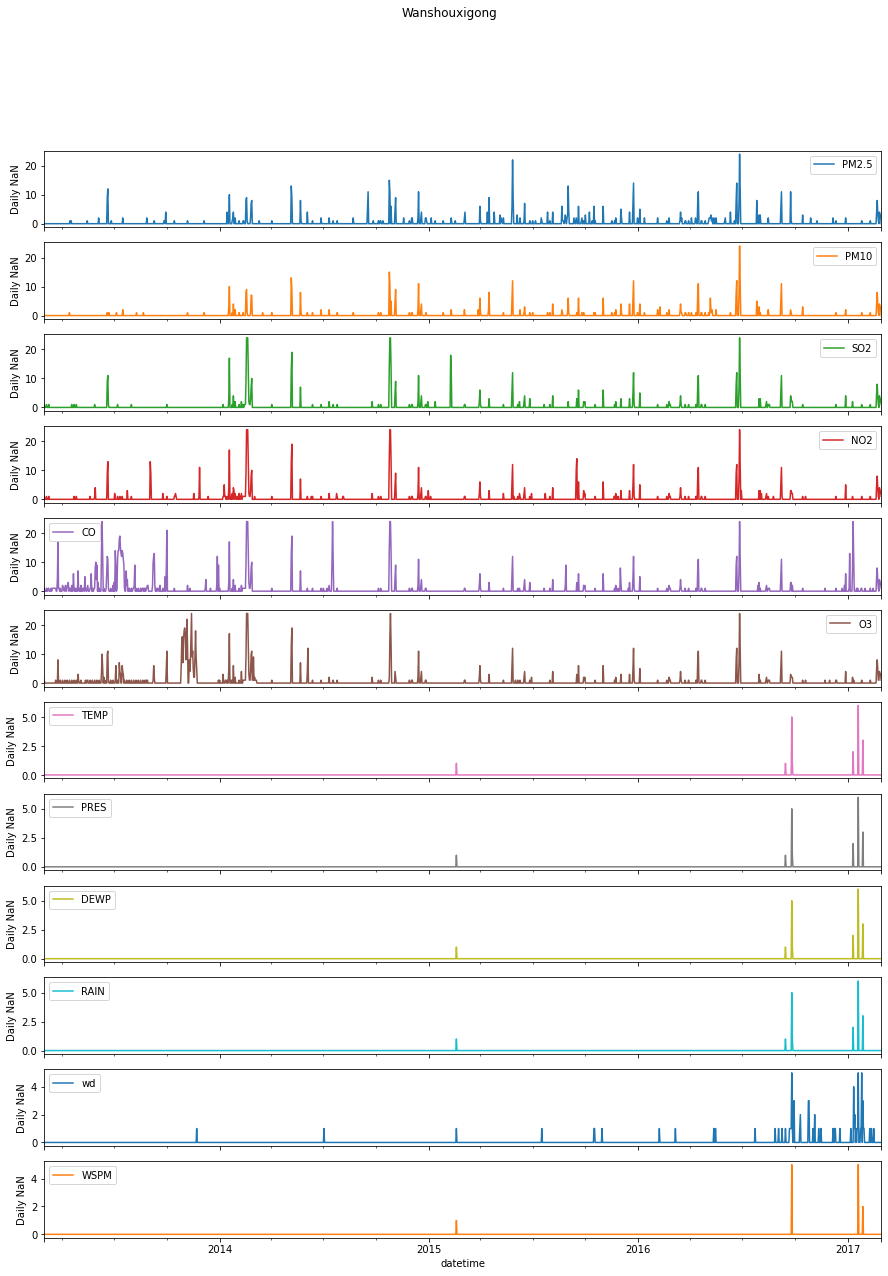

In [6]:
cols_plot = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'wd', 'WSPM']

for k in na_dic.keys():
    axes = na_dic[k][cols_plot].resample("D").sum().plot(figsize=(15, 20), subplots=True, title=k)
    for ax in axes:
        ax.set_ylabel('Daily NaN')
    filename=k+"missing.jpg"
    plt.savefig(filename)

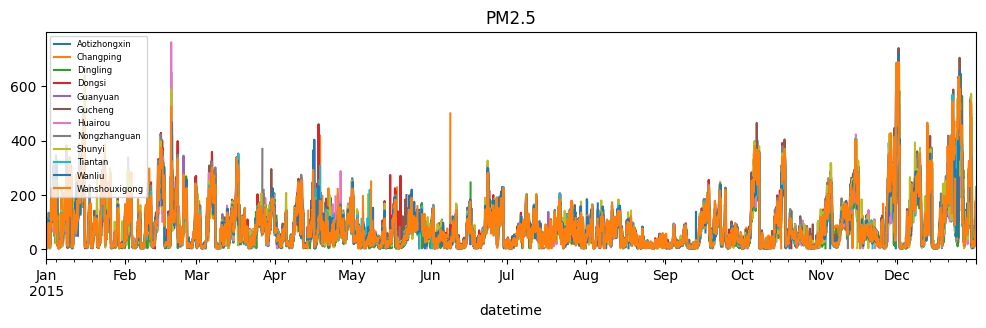

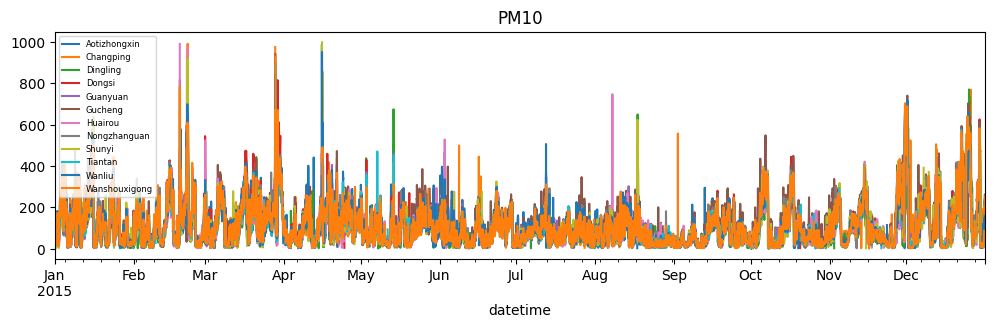

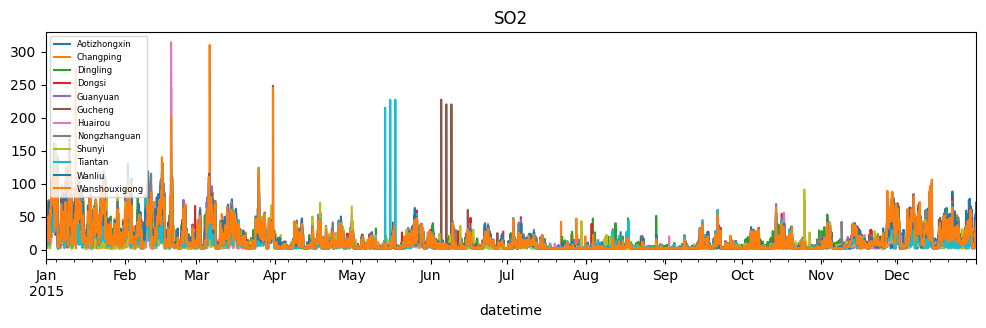

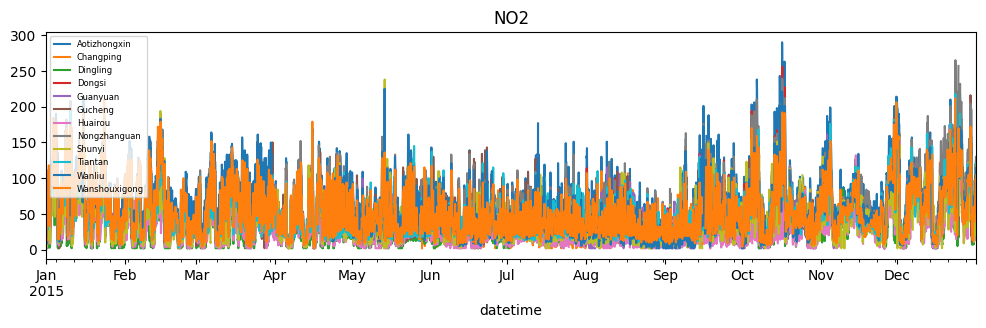

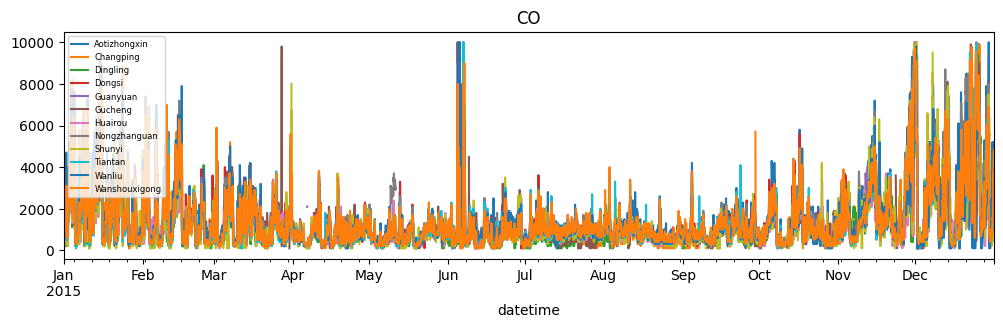

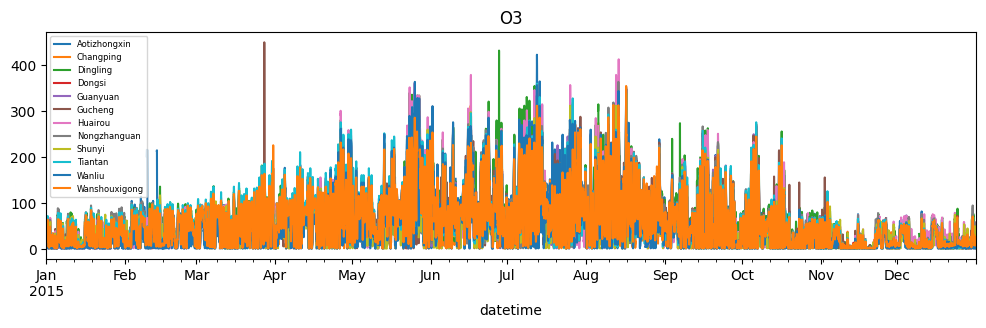

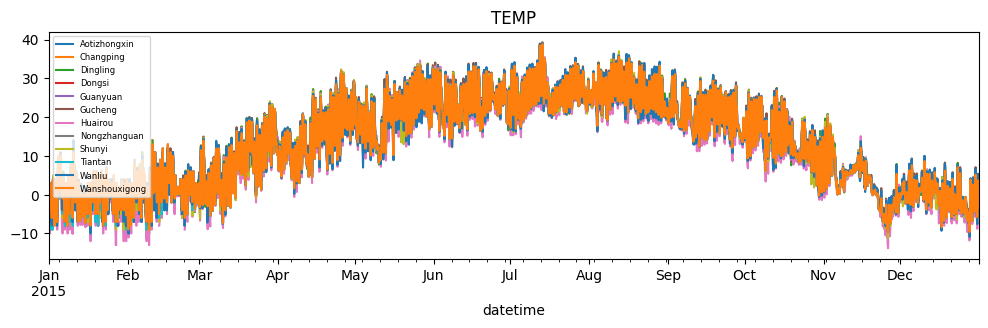

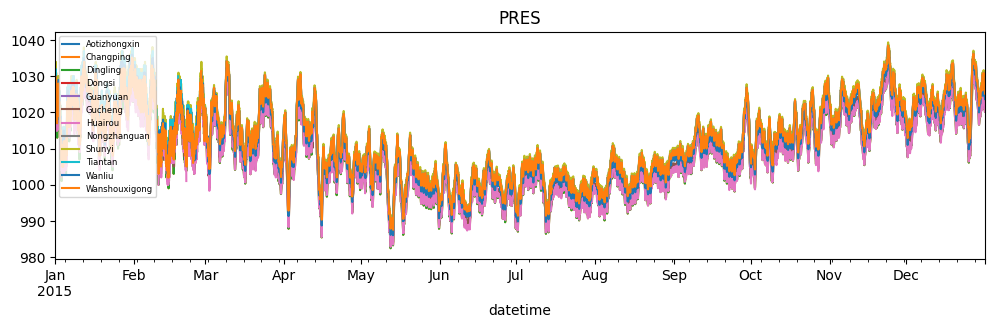

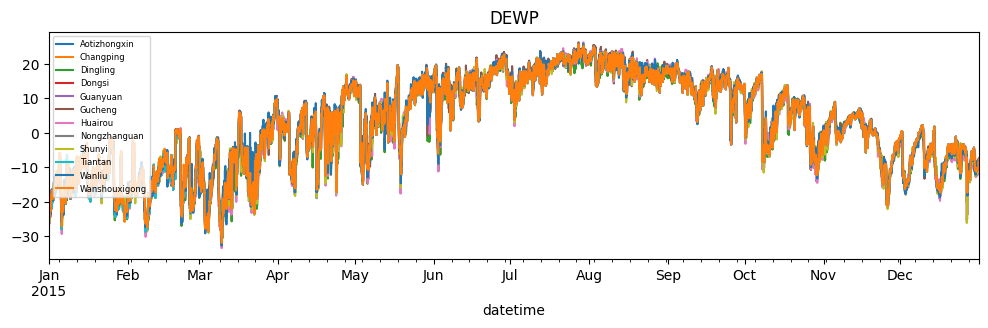

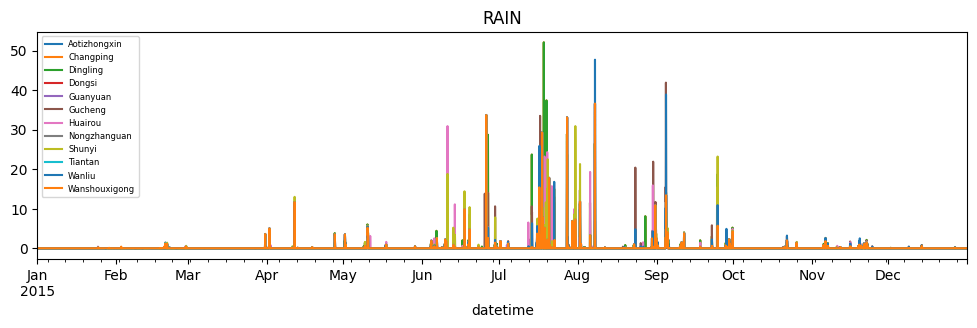

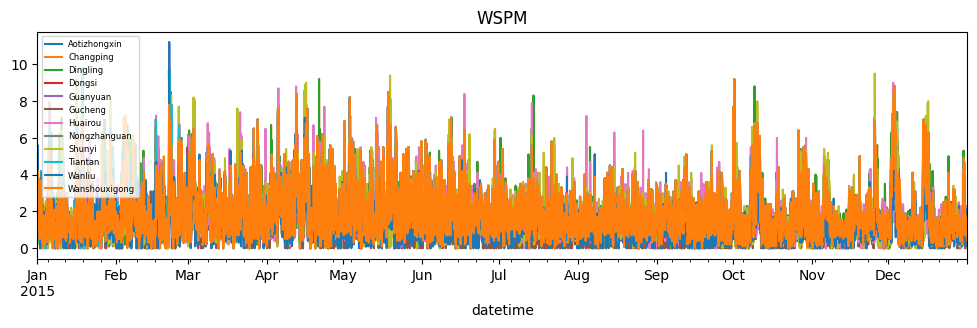

In [7]:
#plot original data for year 2015. Entire range is too hard to visualize. Weather data seems consistant between stations, but pollution data does not. Visualization is messy with so many stations to compare.

cols_plot = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM']
for c in cols_plot:
    plt.figure(figsize=(12, 3), dpi=100)
    for k in dic.keys():
        dic[k][c].loc["2015"].plot(label=k)
    
    plt.title(c)
    plt.legend(loc=2, prop={'size': 6})
    filename="allstations-"+c+".jpg"
    plt.savefig(filename)

In [8]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#interpolation
#inteterploate performs linear interpolation at missing data points.

dic_clean={}
for k in dic.keys():
    dic[k][cols_plot]=dic[k][cols_plot].interpolate()

df_na = pd.DataFrame(index=[dic['Aotizhongxin'].columns])
for k in dic.keys():
    ser=dic[k].isna().sum()
    df_na[k]=ser.values
df_na

,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
PM2.5,0,0,0,0,0,0,0,0,0,0,0,0
PM10,0,0,0,0,0,0,0,0,0,0,0,0
SO2,0,0,0,0,0,0,0,0,0,0,0,0
NO2,0,0,2,0,0,20,0,0,0,0,0,0
CO,0,0,0,0,0,0,0,0,0,0,0,0
O3,0,0,0,0,0,0,0,0,0,0,0,0
TEMP,0,0,0,0,0,0,0,0,0,0,0,0
PRES,0,0,0,0,0,0,0,0,0,0,0,0
DEWP,0,0,0,0,0,0,0,0,0,0,0,0
RAIN,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#find why the interporlate didn't work for some values
print('Gucheng')
print(dic['Gucheng']['NO2'][dic['Gucheng']['NO2'].isna()])
print('Dingling')
print(dic['Dingling']['NO2'][dic['Dingling']['NO2'].isna()])

Gucheng
datetime
2013-03-01 00:00:00   NaN
2013-03-01 01:00:00   NaN
2013-03-01 02:00:00   NaN
2013-03-01 03:00:00   NaN
2013-03-01 04:00:00   NaN
2013-03-01 05:00:00   NaN
2013-03-01 06:00:00   NaN
2013-03-01 07:00:00   NaN
2013-03-01 08:00:00   NaN
2013-03-01 09:00:00   NaN
2013-03-01 10:00:00   NaN
2013-03-01 11:00:00   NaN
2013-03-01 12:00:00   NaN
2013-03-01 13:00:00   NaN
2013-03-01 14:00:00   NaN
2013-03-01 15:00:00   NaN
2013-03-01 16:00:00   NaN
2013-03-01 17:00:00   NaN
2013-03-01 18:00:00   NaN
2013-03-01 19:00:00   NaN
Name: NO2, dtype: float64
Dingling
datetime
2013-03-01 00:00:00   NaN
2013-03-01 01:00:00   NaN
Name: NO2, dtype: float64


In [10]:
#both are empty at the begining of the series, so let's backwards replace with the first available value. We can do this with wind direction too. 
for k in dic.keys():
    dic[k].fillna(method="backfill", inplace=True)

df_na = pd.DataFrame(index=[dic['Aotizhongxin'].columns])
for k in dic.keys():
    ser=dic[k].isna().sum()
    df_na[k]=ser.values
df_na

,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
PM2.5,0,0,0,0,0,0,0,0,0,0,0,0
PM10,0,0,0,0,0,0,0,0,0,0,0,0
SO2,0,0,0,0,0,0,0,0,0,0,0,0
NO2,0,0,0,0,0,0,0,0,0,0,0,0
CO,0,0,0,0,0,0,0,0,0,0,0,0
O3,0,0,0,0,0,0,0,0,0,0,0,0
TEMP,0,0,0,0,0,0,0,0,0,0,0,0
PRES,0,0,0,0,0,0,0,0,0,0,0,0
DEWP,0,0,0,0,0,0,0,0,0,0,0,0
RAIN,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
#combine all data into one dataframe
#use df for master dataframe of all clean data
#use dic_clean for dictionary of each station dataset. Keys are the station name like dic_clean['Aotizhongxin']
df = pd.concat(dic.values())
df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
datetime,,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28 19:00:00
2017-02-28 20:00:00,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28 20:00:00
2017-02-28 21:00:00,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28 21:00:00
